# CSCI 3220: Python for Data Science and AI

## Assignment 4

## Due Date: May 5(Wednesday), 11:59 PM

## Total Points: 36

## Bonus Points: 4

#### ***Write the code in Jupyter notebook (ipynb file) with proper comments. 
#### ***Add proper citation if you take help from a different source (not from the textbook).
#### ***Rename the file with your student ID and submit it in Moodle.

In [259]:
import numpy as np
import pandas as pd

# Question 1
Design and implement a basic neural network using Keras Library for the MNIST digits classification dataset (Keras Toy Dataset).

### A. Split the dataset into train and test sets.

In [263]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### B. The input layer will take the pixel values (one-dimensional array) as input. The network will have three hidden layers with an arbitrary number of nodes in each layer.


In [264]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from tensorflow import keras
from tensorflow.keras import layers

#Convert images to 1D array.
inputTrainPixels = X_train.reshape(60000, 784).astype('float32') / 255
inputTestPixels = X_test.reshape(10000, 784).astype('float32') / 255
outputTrainResults = to_categorical(y_train)
outputTestResults = to_categorical(y_test)

model = Sequential()
model.add(Dense(784, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Citation: learned how to fix shapes incompatibility ValueError by using 'sparse_categorical_crossentropy' from Stack Overflow
#Link: https://stackoverflow.com/questions/62148508/how-can-i-overcome-valueerror-shapes-none-1-and-none-7-are-incompatible
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### C. Print the model summary and plot your designed model architecture. 

In [244]:
#NOTE: Cell 1D (next cell) must be ran first prior to running this cell.
#I kept this cell here for assignment-order purposes.

print(model.summary())

Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_503 (Dense)            (32, 784)                 615440    
_________________________________________________________________
dense_504 (Dense)            (32, 254)                 199390    
_________________________________________________________________
dense_505 (Dense)            (32, 254)                 64770     
_________________________________________________________________
dense_506 (Dense)            (32, 254)                 64770     
_________________________________________________________________
dense_507 (Dense)            (32, 10)                  2550      
Total params: 946,920
Trainable params: 946,920
Non-trainable params: 0
_________________________________________________________________
None


### D. Use 20% of your training data as a validation set, and the rest of the data should be used to train your model. Plot the loss and accuracy for each epoch in the training and validation set.

In [265]:
history = model.fit(inputTrainPixels, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3814 - accuracy: 0.8793 - val_loss: 0.1351 - val_accuracy: 0.9621
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9684 - val_loss: 0.1035 - val_accuracy: 0.9710
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.1233 - val_accuracy: 0.9686
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0559 - accuracy: 0.9836 - val_loss: 0.1160 - val_accuracy: 0.9692
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.1036 - val_accuracy: 0.9718
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0388 - accuracy: 0.9895 - val_loss: 0.1068 - val_accuracy: 0.9780
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.0975 - val_accuracy:

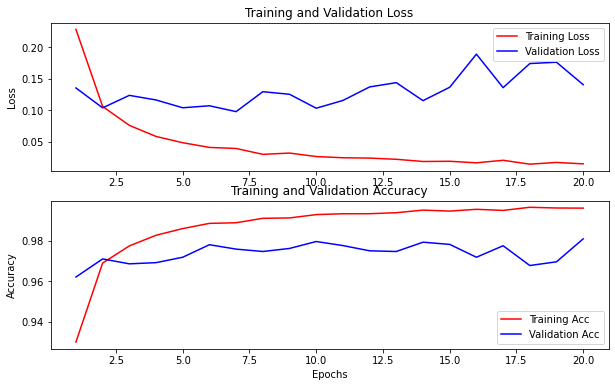

In [266]:
#Citation: Used direct plotting code from the ML_Keras_Demo since it works fine, and is part of the class and/or book.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### E. Based on the plot (question 1d), tune the hyperparameters of the network so that it does not overfit. You should use EarlyStopping (avoid overfitting) and ModelCheckpoint to save the best model based on the performance of the validation set.

In [268]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(inputTrainPixels, y_train, epochs=20, validation_split=0.2, callbacks=[es,mc])

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.1535 - val_accuracy: 0.9788

Epoch 00001: val_accuracy improved from -inf to 0.97883, saving model to model.h5
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0153 - accuracy: 0.9961 - val_loss: 0.1607 - val_accuracy: 0.9781

Epoch 00002: val_accuracy did not improve from 0.97883
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.2176 - val_accuracy: 0.9779

Epoch 00003: val_accuracy did not improve from 0.97883
Epoch 00003: early stopping


### F. Load the best-saved model and evaluate your model's performance in terms of accuracy for the test set.


In [275]:
from keras.models import load_model

#Citation: learned how to load saved model from TensorFlow documentation
#Link: https://www.tensorflow.org/guide/keras/save_and_serialize

loadedModel = load_model("model.h5")

loadedModel.evaluate(inputTestPixels, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1340 - accuracy: 0.9793


[0.13397052884101868, 0.9793330430984497]

# Question 2
Design and implement a convolutional neural network (CNN) using Keras Library for the CIFAR10 small images classification dataset (Keras Toy Dataset).

### A. Split the dataset into train and test sets

In [287]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

### B. The network will take the pixel values (color image- three-dimensional array) as input. You can have an arbitrary number of convolution layers, Maxpooling layers and dense layers to design your network. The network architecture, the number of filters, and kernel size should be adjusted to avoid overfitting.

In [333]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

inputTrainPixels = X_train.astype('float32') / 255
inputTestPixels = X_test.astype('float32') / 255
outputTrainResults = to_categorical(y_train)
outputTestResults = to_categorical(y_test)

cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))
    
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### C. Print the summary and plot the architecture of your network. 

In [335]:
print(cnn.summary())

Model: "sequential_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_552 (Dense)            (None, 10)                46090     
Total params: 121,738
Trainable params: 121,738
Non-trainable params: 0
______________________________________________

### D. Use 20% of your training data as a validation set, and the rest of the data should be used to train your model. Plot the loss and accuracy for each epoch in the training and validation set.


In [336]:
history = cnn.fit(inputTrainPixels, outputTrainResults, epochs=18, validation_split=0.2)

Epoch 1/18
1250/1250 [==============================] - 32s 25ms/step - loss: 1.6949 - accuracy: 0.3874 - val_loss: 1.2114 - val_accuracy: 0.5789
Epoch 2/18
1250/1250 [==============================] - 32s 26ms/step - loss: 1.1233 - accuracy: 0.6114 - val_loss: 1.0437 - val_accuracy: 0.6413
Epoch 3/18
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9668 - accuracy: 0.6672 - val_loss: 0.9985 - val_accuracy: 0.6625
Epoch 4/18
1250/1250 [==============================] - 31s 25ms/step - loss: 0.8650 - accuracy: 0.7006 - val_loss: 0.9482 - val_accuracy: 0.6744
Epoch 5/18
1250/1250 [==============================] - 31s 25ms/step - loss: 0.7874 - accuracy: 0.7311 - val_loss: 0.9146 - val_accuracy: 0.6901
Epoch 6/18
1250/1250 [==============================] - 32s 26ms/step - loss: 0.7323 - accuracy: 0.7495 - val_loss: 0.9233 - val_accuracy: 0.6917
Epoch 7/18
1250/1250 [==============================] - 31s 25ms/step - loss: 0.6656 - accuracy: 0.7716 - val_loss: 0.9544 -

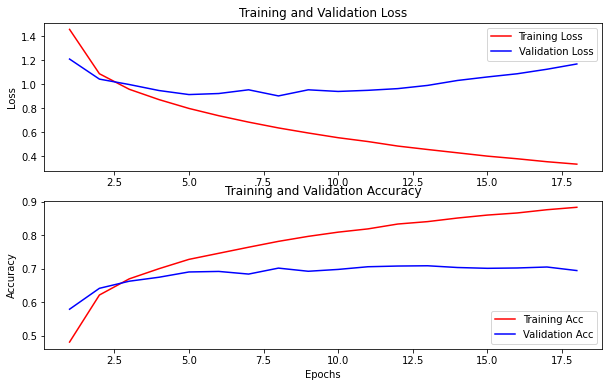

In [337]:
#Citation: Used direct plotting code from the ML_Keras_Demo since it works fine, and is part of the class and/or book.
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### E. Based on the plot (question 2d), tune the hyperparameters of the network so that it does not overfit the training data. Use EarlyStopping to stop the training if there is no improvement and ModelCheckpoint to save the best model based on the validation set.

In [339]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#I noticed that it seems like no significant improvements were found after the the 'maximum' validation accuracy model was created.
#Therefore, an early stopping of 2 is appropriate to avoid overfitting.

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
mc = ModelCheckpoint('cnn.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = cnn.fit(inputTrainPixels, outputTrainResults, epochs=18, validation_split=0.2, callbacks=[es,mc])

Epoch 1/18
1250/1250 [==============================] - 33s 26ms/step - loss: 0.2765 - accuracy: 0.9038 - val_loss: 1.3188 - val_accuracy: 0.6904

Epoch 00001: val_accuracy improved from -inf to 0.69040, saving model to cnn.h5
Epoch 2/18
1250/1250 [==============================] - 31s 25ms/step - loss: 0.2645 - accuracy: 0.9055 - val_loss: 1.3576 - val_accuracy: 0.6920

Epoch 00002: val_accuracy improved from 0.69040 to 0.69200, saving model to cnn.h5
Epoch 3/18
1250/1250 [==============================] - 31s 25ms/step - loss: 0.2434 - accuracy: 0.9130 - val_loss: 1.3884 - val_accuracy: 0.6895

Epoch 00003: val_accuracy did not improve from 0.69200
Epoch 00003: early stopping


### F. Load the best-saved model and evaluate your model's performance in terms of accuracy for the test set.

In [340]:
from keras.models import load_model

#Citation: learned how to load saved model from TensorFlow documentation
#Link: https://www.tensorflow.org/guide/keras/save_and_serialize

loadedCNN = load_model("cnn.h5")

loadedCNN.evaluate(inputTestPixels, outputTestResults)

313/313 [==============================] - 2s 6ms/step - loss: 1.3862 - accuracy: 0.6871


[1.3862144947052002, 0.6870999932289124]

# Bonus: 1g. Compare the performance with a convolutional neural network (CNN). You canuse the same network you designed in question 2.


In [403]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

outputTrainResults = to_categorical(y_train)
outputTestResults = to_categorical(y_test)

#Convolutional Neural Network
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Basic Neural Network
model = Sequential()
model.add(Dense(784, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [404]:
#Conversion for Basic Neural Network
inputTrainPixels = X_train.reshape(60000, 784).astype('float32') / 255
inputTestPixels = X_test.reshape(10000, 784).astype('float32') / 255

model.fit(inputTrainPixels, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3724 - accuracy: 0.8810 - val_loss: 0.1178 - val_accuracy: 0.9650
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1129 - accuracy: 0.9673 - val_loss: 0.1046 - val_accuracy: 0.9696
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0746 - accuracy: 0.9779 - val_loss: 0.1053 - val_accuracy: 0.9729
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 0.0969 - val_accuracy: 0.9752
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0938 - val_accuracy: 0.9767
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.1105 - val_accuracy: 0.9728
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.1009 - val_accuracy:

In [405]:
#Conversion for Convulutional Neural Network
inputTrainPixels = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
inputTestPixels = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255

cnn.fit(inputTrainPixels, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3298 - accuracy: 0.9007 - val_loss: 0.0665 - val_accuracy: 0.9782
Epoch 2/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.0509 - val_accuracy: 0.9854
Epoch 3/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0419 - val_accuracy: 0.9870
Epoch 4/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0389 - val_accuracy: 0.9893
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0378 - val_accuracy: 0.9890
Epoch 6/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0416 - val_accuracy: 0.9894
Epoch 7/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.0445 -

### Comparison:

Based on running 20 epochs on both the basic and convolutional neural networks as defined in the above cells, I noticed that the convolutional neural network experienced consistently higher accuracy with lower loss on the validation set compared to the basic network.

However, I also noticed that the cycle time of each epoch in the convolutional network was noticably much longer compared to the basic network. The average epoch time was about 6.5 seconds and 27.5 seconds respectively on the basic and convolutional networks respectively. This means that the training time of the convolutional network as more than 4x slower than the basic network.